# Zoo Animal Classification
### A database containing 18 attributes(15 of which are Boolean) in order to classify amongst 100 unique animals that are categorized into 7 Class Types including: Mammal, Bird, Reptile, Fish, Amphibian, Bug and Invertebrate. Acknowledgments:  UCI Machine Learning: https://archive.ics.uci.edu/ml/datasets/Zoo

In [2]:
#import packages to be used for data analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy.stats import zscore
from mpl_toolkits.mplot3d import Axes3D
sns.set()
from warnings import simplefilter
simplefilter(action='ignore')

In [3]:
#read in first dataset into pandas
df1 = pd.read_csv('zoo.csv')

In [4]:
#read in second dataset into pandas
df2 = pd.read_csv('class.csv')

In [5]:
#take a look at dataframe 1
df1.head()

,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


In [6]:
#take a look at dataframe 2
df2.loc[0, 'Number_Of_Animal_Species_In_Class'] = 40
df2

,Class_Number,Number_Of_Animal_Species_In_Class,Class_Type,Animal_Names
0,1,40,Mammal,"aardvark, antelope, bear, boar, buffalo, calf,..."
1,2,20,Bird,"chicken, crow, dove, duck, flamingo, gull, haw..."
2,3,5,Reptile,"pitviper, seasnake, slowworm, tortoise, tuatara"
3,4,13,Fish,"bass, carp, catfish, chub, dogfish, haddock, h..."
4,5,4,Amphibian,"frog, frog, newt, toad"
5,6,8,Bug,"flea, gnat, honeybee, housefly, ladybird, moth..."
6,7,10,Invertebrate,"clam, crab, crayfish, lobster, octopus, scorpi..."


In [7]:
#view dataframe 1 column names
df1.columns

Index(['animal_name', 'hair', 'feathers', 'eggs', 'milk', 'airborne',
       'aquatic', 'predator', 'toothed', 'backbone', 'breathes', 'venomous',
       'fins', 'legs', 'tail', 'domestic', 'catsize', 'class_type'],
      dtype='object')

In [8]:
#view dataframe 2 column names
df2.columns

Index(['Class_Number', 'Number_Of_Animal_Species_In_Class', 'Class_Type',
       'Animal_Names'],
      dtype='object')

In [9]:
#take a look at shapes
print(df1.shape)
print(df2.shape)

(101, 18)
(7, 4)


In [10]:
#take a look at properties of df1
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 18 columns):
animal_name    101 non-null object
hair           101 non-null int64
feathers       101 non-null int64
eggs           101 non-null int64
milk           101 non-null int64
airborne       101 non-null int64
aquatic        101 non-null int64
predator       101 non-null int64
toothed        101 non-null int64
backbone       101 non-null int64
breathes       101 non-null int64
venomous       101 non-null int64
fins           101 non-null int64
legs           101 non-null int64
tail           101 non-null int64
domestic       101 non-null int64
catsize        101 non-null int64
class_type     101 non-null int64
dtypes: int64(17), object(1)
memory usage: 14.3+ KB


In [11]:
#take a look at properties of df2
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 4 columns):
Class_Number                         7 non-null int64
Number_Of_Animal_Species_In_Class    7 non-null int64
Class_Type                           7 non-null object
Animal_Names                         7 non-null object
dtypes: int64(2), object(2)
memory usage: 304.0+ bytes


In [12]:
#check for missing values in dataframe 1
df1.isnull().sum()

animal_name    0
hair           0
feathers       0
eggs           0
milk           0
airborne       0
aquatic        0
predator       0
toothed        0
backbone       0
breathes       0
venomous       0
fins           0
legs           0
tail           0
domestic       0
catsize        0
class_type     0
dtype: int64

In [13]:
#check for missing values in dataframe 2
df2.isnull().sum()

Class_Number                         0
Number_Of_Animal_Species_In_Class    0
Class_Type                           0
Animal_Names                         0
dtype: int64

In [14]:
#rename column 'class_type' to be 'Class_Number' in order to merge
new_columns = df1.columns.values
new_columns[17] = 'Class_Number'
df1.columns = new_columns

In [15]:
#recheck df1 column names
df1.columns

Index(['animal_name', 'hair', 'feathers', 'eggs', 'milk', 'airborne',
       'aquatic', 'predator', 'toothed', 'backbone', 'breathes', 'venomous',
       'fins', 'legs', 'tail', 'domestic', 'catsize', 'Class_Number'],
      dtype='object')

In [16]:
#merge both datasets on common column, also drop 'girl' row 
df = pd.merge(df1, df2, on='Class_Number')
df = df[df.animal_name != 'girl']
df.shape

(100, 21)

In [17]:
#check new dataframe column names
df.columns

Index(['animal_name', 'hair', 'feathers', 'eggs', 'milk', 'airborne',
       'aquatic', 'predator', 'toothed', 'backbone', 'breathes', 'venomous',
       'fins', 'legs', 'tail', 'domestic', 'catsize', 'Class_Number',
       'Number_Of_Animal_Species_In_Class', 'Class_Type', 'Animal_Names'],
      dtype='object')

In [18]:
#check that new dataframe has no missing values
df.isnull().sum()

animal_name                          0
hair                                 0
feathers                             0
eggs                                 0
milk                                 0
airborne                             0
aquatic                              0
predator                             0
toothed                              0
backbone                             0
breathes                             0
venomous                             0
fins                                 0
legs                                 0
tail                                 0
domestic                             0
catsize                              0
Class_Number                         0
Number_Of_Animal_Species_In_Class    0
Class_Type                           0
Animal_Names                         0
dtype: int64

In [19]:
#take a look at animal_name column and sort out unique values to see if data is repeated
all_animal_names = df['animal_name'].unique()
np.sort(all_animal_names)
len(all_animal_names)

99

### There are 99 unique animal names out of 100. Frog is repeated twice since one frog is listed as venemous and the other frog is listed as not venemous. 

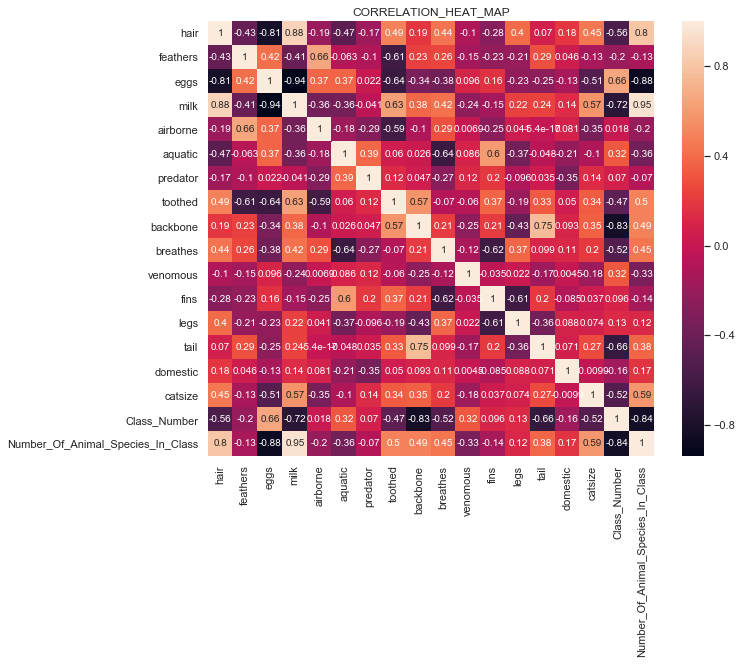

In [21]:
#look for trends/correlations by plotting a correlation heatmap
plt.subplots(figsize=(10,8))
ax = plt.axes()
ax.set_title("CORRELATION_HEAT_MAP")
corr = df.corr()
sns.heatmap(corr, annot=True, xticklabels=corr.columns.values, yticklabels=corr.columns.values)

### TRENDS SEEN: 1.)High correlation between teeth and backbone which, according to research, is due to the "Teeth being formed from the neural tube which is the embryonic tissue that becomes part of the brain and spinal cord.[2]"
### 2.)High correlation between aquatic and fins.
### 3.)High correlation between tail and backbone which according to Carnegie Museum of Natural History[3], is because "the tail is part of the caudal vertebra".
### 4.)Low correlation between domestic animals and predators.
### 5.)Finally, there is a high correlation between breathing and animals with hair. Whereas, there is a negative correlation between breathing atmospheric air and animals that have fins and also between breathing atmospheric air and animals that are aquatic.  This makes sense since gills, used by fish to breathe, collapse out of water.  

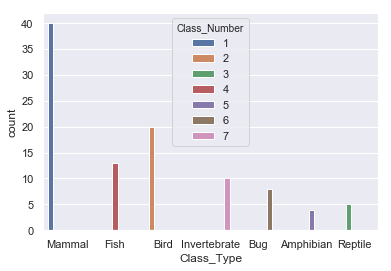

In [22]:
#plot the number of animals in each class number
sns.countplot(x='Class_Type', data=df, hue='Class_Number')

### Majority of animals are in class number 1(mammals) and include: aardvarks, antelopes, bears, and boars-just to name a few. 

In [23]:
#since tail is a python function, change the column name to tails
new_columns = df.columns.values
new_columns[14] = 'tails'
df.columns = new_columns
new_columns1 = df1.columns.values
new_columns1[14] = 'tails'
df1.columns = new_columns1

In [24]:
#take a look at how many animals have tails and in which class number
no_tails = df[df.tails==0]
print("number of animals without a tail:", len(no_tails))
print("number of animals with a tail:", 100 - len(no_tails))
print(df1.groupby('Class_Number').tails.sum())
df2.groupby('Class_Number').Number_Of_Animal_Species_In_Class.sum()

number of animals without a tail: 25
number of animals with a tail: 75
Class_Number
1    35
2    20
3     5
4    13
5     1
6     0
7     1
Name: tails, dtype: int64


Class_Number
1    40
2    20
3     5
4    13
5     4
6     8
7    10
Name: Number_Of_Animal_Species_In_Class, dtype: int64

Text(0.5,1,'CLASS 1=MAMMAL, CLASS 2=BIRD, CLASS 3=REPTILE, CLASS 4=FISH, CLASS 5=AMPHIBIAN, CLASS 6=BUG, CLASS 7=INVERTEBRAE')

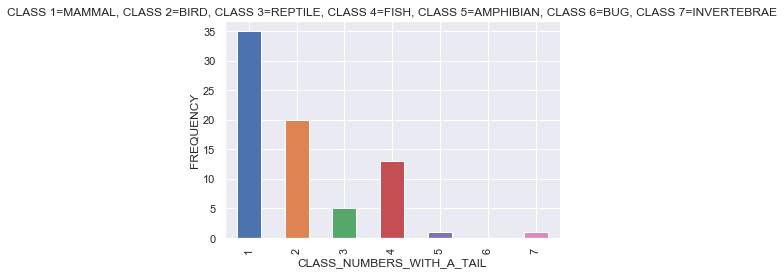

In [25]:
#perform groupby between class number and animals with tails
df.groupby('Class_Number').tails.sum().plot(kind='bar')
plt.xlabel('CLASS_NUMBERS_WITH_A_TAIL')
plt.ylabel('FREQUENCY')
plt.title('CLASS 1=MAMMAL, CLASS 2=BIRD, CLASS 3=REPTILE, CLASS 4=FISH, CLASS 5=AMPHIBIAN, CLASS 6=BUG, CLASS 7=INVERTEBRAE')

### The bar plot above shows that 75% of all animals in the dataset have tails, and 50% of those 75% are mammals(Class 1). According to the bar plot, none of the bugs(Class 6) have tails and very few amphibians and invertebrates(Class 5 & 7) have tails. The graph also shows that Birds, Reptiles and Fish(Classes 2, 3 & 4) all have tails. Since only one class of animals, bugs, which consists of only 8 out of the total 100 animals, were found to not have tails, it is plausible that tails may not be the strongest classification feature.

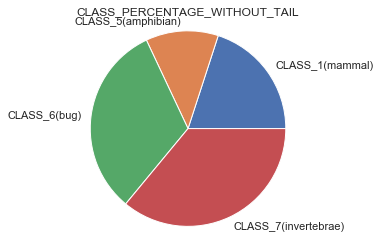

In [86]:
#plot pie chart showing percentage of animals without a tail
labels = 'CLASS_1(mammal)','CLASS_5(amphibian)','CLASS_6(bug)','CLASS_7(invertebrae)'
sizes = [20, 12, 32, 36]
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels)
ax1.axis('equal')
plt.title("CLASS_PERCENTAGE_WITHOUT_TAIL")
plt.show()

### Since there was a 0.75 correlation on the heatmap between animals having a backbone and having a tail, there is a possibility that animals without a backbone are correlated with not having a tail.  The pie chart above shows this exact finding and also shows that the highest percentage of animals without a backbone are invertebrates which makes sense.

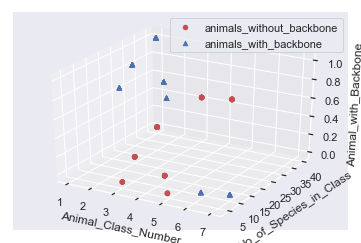

In [27]:
#after merging df1 into df2 take a look at trends with a 3D scatter plot
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
x = df['Class_Number']
yy = df['Number_Of_Animal_Species_In_Class']
z = df.backbone==0
xb = df['Class_Number']
yyb = df['Number_Of_Animal_Species_In_Class']
zb = df.backbone==1
scatter1 = ax.scatter(x, yy, z, c='r', marker='o')
scatter2 = ax.scatter(xb, yyb, zb, c='b', marker='^')
ax.set_xlabel('Animal_Class_Number')
ax.set_ylabel("No_of_Species_in_Class")
ax.set_zlabel("Animal_with_Backbone")
ax.legend([scatter1,scatter2], ['animals_without_backbone','animals_with_backbone'])
plt.show()

In [28]:
print(df1.groupby('Class_Number').backbone.sum())

Class_Number
1    41
2    20
3     5
4    13
5     4
6     0
7     0
Name: backbone, dtype: int64


### The 3D scatterplot above shows that all animals in class 1, 2, 3 ,4  and 5 have a backbone.  The scatter plot also shows that none of the animals in classes 6&7 have a backbone which makes sense since those classes include invertebrates and bugs.  Based on the scatter plot findings, backbone may not be the strongest feature for animal classification.

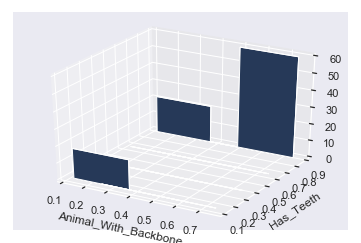

In [29]:
#take closer look at the trends seen on the correlation heatmap w/a 3d histogram
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import style

fig = plt.figure()
ax = fig.add_subplot(111,projection='3d')
x = df['backbone']
y = df['toothed']

hist, xedges, yedges, = np.histogram2d(x,y,bins=(4,4))
xpos, ypos = np.meshgrid(xedges[:1]+xedges[1:],yedges[:-1]+yedges[1:])
xpos = xpos.flatten()/2.
ypos = ypos.flatten()/2.
zpos = np.zeros_like (xpos)
dx = xedges [1] - xedges[0]
dy = yedges [1] - yedges[1]
dz = hist.flatten()

ax.bar3d(xpos, ypos, zpos,dx, dy, dz, color='b', zsort='average')
plt.xlabel('Animal_With_Backbone')
plt.ylabel("Has_Teeth")

plt.show()

### The 3D histogram above agrees with the correlation heatmap finding of there being a strong correlation between animals having a backbone and having teeth.  The histogram shows that the reason the correlation is only 0.6 and not greater, could be due to the fact that there are animals without a backbone having teeth.  

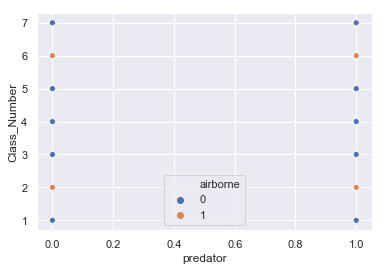

In [30]:
#scatterplot of correlation between predator and airborne and animal class
sns.scatterplot( x = 'predator',y = 'Class_Number', data = df, hue = 'airborne')

### The correlation heatmap showed a negative correlation between animals that are predators and animals that are airborne.The scatterplot above validates this heatmap finding by showing that the majority of predators are not airborne. It also shows that predators may not be the strongest feature in animal classification.  

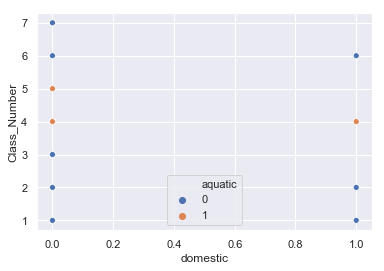

In [31]:
#plot which class of animals falls within the category of domestic
x_cols = ['hair', 'feathers', 'eggs', 'milk', 'airborne',
       'aquatic', 'predator', 'toothed', 'backbone', 'breathes', 'venomous',
       'fins', 'legs', 'tails', 'domestic', 'catsize']
X_cols = df[x_cols]
y = df['Class_Number'].values
dom = X_cols['domestic'].values
sns.scatterplot(x = 'domestic', y = 'Class_Number', data = df, hue = 'aquatic')
plt.show()

### According to the correlation heatmap, the attribute domestic had a low correlation with all of the other attributes. The scatterplot above shows that domestic animals fall in the classes of 1, 2, 4 and 6 which corresponds to: mammals, birds, fish and bugs respectively. The scatterplot also shows that all of the classes contain animals that are not domestic.  This may explain why domestic has such a low correlation with all of the other attributes.  The scatterplot also shows that the only domestic animals that are aquatic are class 4(fish) which makes sense. In conclusion, the scatterplot indicates that domestic may not be the strongest feature in animal classification. 

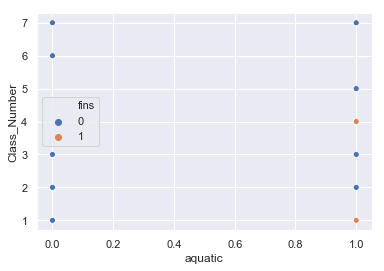

In [32]:
#plot trends between aquatic animals,class number and animals with fins
sns.scatterplot(x = 'aquatic', y = 'Class_Number', data = df, hue = 'fins')
plt.show()

### The scatterplot above shows that finned animals belong to classes 1 & 2(mammals and fish) which makes sense.The scatterplot also shows that 6 out of the 7 total classes include  animals that are aquatic and that 5 out of the 7 total classes include animals that are not aquatic.  This agrees with the low correlation on the heatmap and indicates that aquatic may also not be the strongest feature for animal classification. 

In [33]:
#identify how many venomous animals are in each class
ven = df[df.venomous==1]
print("number of total venomous animals:", len(ven))
df.groupby('Class_Number').venomous.sum()

number of total venomous animals: 8


Class_Number
1    0
2    0
3    2
4    1
5    1
6    2
7    2
Name: venomous, dtype: int64

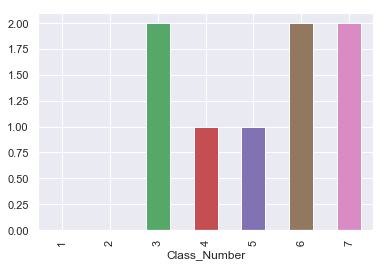

In [34]:
#perform groupby between venomous animals and class number
df.groupby('Class_Number').venomous.sum().plot(kind='bar')

###  The barplot above shows that there are no venomous animals in classes 1 &2(mammals and fish).  It also shows that the majority of venomous animals are in classes 3, 6 and 7(reptiles, bugs and invertebrates).  The bar plot shows that the attribute venomous may not be the strongest feature in animal classification.

### In conclusion, data exploration and visualization findings showed that the following features may not be the strongest predictors of animal class: 1.)domestic, 2.)tails, 3.)aquatic, 4.)backbone, 5.)venomous and 6.)predator.

## Hypothesis Testing #1: 
### null hypothesis: animals that can breathe that have fins - animals that can't breathe that have fins = 0
### alt hypothesis:  animals that can breathe that have fins - animals that can't breathe that have fins != 0

In [35]:
print("animals that breathe with fins:", sum(df[df.breathes==1].fins))
print("animals that don't breathe with fins:", sum(df[df.breathes==0].fins))
resp = df[df.breathes == 1]
print("number of breathing animals:", len(resp))
no_resp = df[df.breathes == 0] 
print("number of non-breathing animals:",len(no_resp))
fin = df[df.fins == 1]
print("number of finned animals:", len(resp))
no_fin = df[df.fins == 0] 
print("number of non-finned animals:",len(no_resp))

animals that breathe with fins: 4
animals that don't breathe with fins: 13
number of breathing animals: 79
number of non-breathing animals: 21
number of finned animals: 79
number of non-finned animals: 21


In [36]:
from statsmodels.stats.weightstats import ztest
z, pval = ztest(resp['fins'],no_resp['fins'], alternative='two-sided')
print('z: {} , pval: {}'.format(z, pval))

z: -7.748207643475683 , pval: 9.319865314417025e-15


### Since the p-value is greater than 0.05, we fail to reject the null hypothesis that there's no statistical difference.  In other words, there's no statistical difference between animals that can breathe with fins and animals that can't breathe with fins.  This statistical conclusion makes sense since our correlation heatmap showed a strong negative correlation between animals that can breathe atmospheric air and animals having fins.  

## Hypothesis Testing #2: 
### null hypothesis: animals that are domestic that are predators - animals that are not domestic that are predators = 0
### alt hypothesis: animals that are domestic that are predators - animals that are not domestic that are predators  != 0

In [37]:
print("animals that are domestic that are predators:", sum(df[df.domestic==1].predator))
print("animals that are not domestic that are predators:", sum(df[df.domestic==0].predator))
dome = df[df.domestic == 1]
print("number of domestic animals:", len(dome))
no_dome = df[df.domestic == 0] 
print("number of non-domestic animals:",len(no_dome))
pred = df[df.predator == 1]
print("number of predators:", len(pred))
no_pred = df[df.predator == 0] 
print("number of non-predator animals:",len(no_pred))

animals that are domestic that are predators: 1
animals that are not domestic that are predators: 54
number of domestic animals: 12
number of non-domestic animals: 88
number of predators: 55
number of non-predator animals: 45


In [38]:
z, pval = ztest(dome['predator'],no_dome['predator'], alternative='two-sided')
print('z: {} , pval: {}'.format(z, pval))

z: -3.6554188483020296 , pval: 0.0002567624228369451


### Since the p-value is less than 0.05, we reject the null hypothesis and conclude that there is a statistical difference between domestic animals that are predators and non-domestic animals that are predators.  This statistical conclusion makes sense since our correlation heatmap showed a low correlation between domestic and predator. This also agrees with the scatterplot finding that the attribute domestic may not be the strongest feature in animal classification.

### Supervised machine learning classification algorithms will be utilized in this project since the response being predicted, animal class, is categorical and the values are finite. Scikit-learn has the following requirements which will need to be validated first: 1.)features and response are separate objects 2.) features and response are numeric 3.)features and response are numpy arrays 4.)features and response have specific shapes. 

In [39]:
#remove non-numeric columns;insure numpy array
x_cols = ['hair', 'feathers', 'eggs', 'milk', 'airborne',
       'aquatic', 'predator', 'toothed', 'backbone', 'breathes', 'venomous',
       'fins', 'legs', 'tails', 'domestic', 'catsize']
X = df[x_cols].as_matrix()
print(type(X))
print(X.shape)

<class 'numpy.ndarray'>
(100, 16)


In [40]:
#assign variable y to seven class numbers;insure numpy array;check shapes match
y = df['Class_Number'].values
print(type(y))
y.shape

<class 'numpy.ndarray'>


(100,)

In [41]:
#split data into a train and test set,create a decision tree classifier object
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
dec_tre = DecisionTreeClassifier()
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3,random_state=42)
#train decision tree classifier
dec_tre.fit(X_train,y_train)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(70, 16) (30, 16) (70,) (30,)


In [42]:
#predict the response for the test dataset and print the decision tree model accuracy
from sklearn import metrics
y_pred = dec_tre.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test,y_pred))

Accuracy: 0.966666666667


In [43]:
#perform cross-validation on decision tree model
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import SelectFromModel
scores = cross_val_score(dec_tre, X, y, cv=4)
print("Cross-validation scores: {}".format(scores))
print("Average cross-validation score: {:.2f}".format(scores.mean()))

Cross-validation scores: [ 0.96296296  0.96        0.91666667  0.95833333]
Average cross-validation score: 0.95


### The test accuracy on the decision tree model and the cross-validation score respectively are 0.97 and 0.95. Next, Grid SearchCV will be utilized to tune the hyperparameters.

In [44]:
#first view all the hyperparameters utlized
from pprint import pprint
print('Hyperparameters currently in use:\n')
pprint(dec_tre.get_params())

Hyperparameters currently in use:

{'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'presort': False,
 'random_state': None,
 'splitter': 'best'}


In [45]:
#perform GridSearchCV to tune the hyperparameters on the decision tree model
from sklearn.model_selection import GridSearchCV
from warnings import simplefilter
simplefilter(action='ignore', category=DeprecationWarning)
param_grid = {
    'random_state': [1,5,42],
    'max_depth': [1,10,100]}
dec_tre_cv = GridSearchCV(dec_tre,param_grid,cv=4)
dec_tre_cv.fit(X,y)
print(dec_tre_cv.best_params_)
print(dec_tre_cv.best_score_)

{'max_depth': 10, 'random_state': 42}
0.96


In [46]:
print(type(X))
print(type(y))
X.shape
y.shape

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


(100,)

### The tuned hyperparemeters are random_state=42 and max_depth=10 and this improves cv accuracy from 0.95 to 0.96. Next, feature selection will be utilized to make sure the best features are chosen for the decision tree model. 

In [47]:
#check if the correct features were selected
from sklearn.feature_selection import SelectFromModel
sel = SelectFromModel(dec_tre, threshold = 0.005)
sel.fit(X_cols,y)

SelectFromModel(estimator=DecisionTreeClassifier(class_weight=None,
                                                 criterion='gini',
                                                 max_depth=None,
                                                 max_features=None,
                                                 max_leaf_nodes=None,
                                                 min_impurity_decrease=0.0,
                                                 min_impurity_split=None,
                                                 min_samples_leaf=1,
                                                 min_samples_split=2,
                                                 min_weight_fraction_leaf=0.0,
                                                 presort=False,
                                                 random_state=None,
                                                 splitter='best'),
                max_features=None, norm_order=1, prefit=False, threshold=0.005)

In [48]:
#print out the list of selected features from sklearn
sel.get_support(indices=True)
selected_feat=X_cols.columns[(sel.get_support())]
print(len(selected_feat))
print(selected_feat)

9
Index(['feathers', 'eggs', 'milk', 'airborne', 'aquatic', 'predator',
       'backbone', 'fins', 'legs'],
      dtype='object')


### The 9 best features chosen were: ( 'feathers', 'milk','eggs', 'airborne', 'aquatic', 'predator','breathes', 'fins', 'legs').  This means the features dropped were: (domestic, tails, breathes, venomous, hair, catsize and toothed). 

In [49]:
#utilize tuned hyperparameters and previous 16 features to compare accuracy score
dec_tre = DecisionTreeClassifier(max_depth=10)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3,random_state=42)
dec_tre.fit(X_train,y_train)
y_pred = dec_tre.predict(X_test)
print("Decision Tree Classifier Accuracy on original 16 features:",metrics.accuracy_score(y_test,y_pred))
scores = cross_val_score(dec_tre, X, y, cv=4)
print("Average Decision Tree cross-validation score on original 16 features: {:.2f}".format(scores.mean()))

#utilize the tuned hyperparameters and the selected 9 features to see if the decision tree classifier improves
x2_cols = [ 'feathers','milk','eggs','airborne','aquatic', 'predator', 'backbone','fins', 'legs']
X2 = df[x2_cols].as_matrix()
dec_tre = DecisionTreeClassifier(max_depth=10)
X2_train, X2_test, y2_train, y2_test = train_test_split(X2,y,test_size = 0.3,random_state=42)
dec_tre.fit(X2_train,y2_train)
y2_pred = dec_tre.predict(X2_test)
print("Decision Tree Accuracy on 9 best selected features:",metrics.accuracy_score(y2_test,y2_pred))
scores = cross_val_score(dec_tre, X2, y, cv=4)
print("Average Decision Tree cross-validation score on 9 best selected features: {:.2f}".format(scores.mean()))

Decision Tree Classifier Accuracy on original 16 features: 0.966666666667
Average Decision Tree cross-validation score on original 16 features: 0.92
Decision Tree Accuracy on 9 best selected features: 0.966666666667
Average Decision Tree cross-validation score on 9 best selected features: 0.97


In [50]:
#perform confusion matrix on decision tree classifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
dec_tre.fit(X2_train, y2_train)
dec_tre_pred = dec_tre.predict(X2_test)
conf_matrix_dec_tre = confusion_matrix(y2_test, dec_tre_pred)
print(conf_matrix_dec_tre)
print(classification_report(y2_test,dec_tre_pred))

[[13  0  0  0  0  0  0]
 [ 0  5  0  0  0  0  0]
 [ 0  0  0  0  1  0  0]
 [ 0  0  0  4  0  0  0]
 [ 0  0  0  0  0  0  0]
 [ 0  0  0  0  0  3  0]
 [ 0  0  0  0  0  0  4]]
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00         5
           3       0.00      0.00      0.00         1
           4       1.00      1.00      1.00         4
           5       0.00      0.00      0.00         0
           6       1.00      1.00      1.00         3
           7       1.00      1.00      1.00         4

    accuracy                           0.97        30
   macro avg       0.71      0.71      0.71        30
weighted avg       0.97      0.97      0.97        30



### When the best features are chosen and the hyperparmeters are tuned, the decision tree model cross-validation score improves. However, the test accuracy score remains the same.   The following classifiers will be utilized next to see if the classification test accuracy can be improved further: Support Vector Machine,Gaussian Naive Bayes, Random Forest and K nearest neighbor.

In [51]:
#utilize SVM classifier and compare model prediction accuracy 
from sklearn.svm import SVC
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=42)
svmc = SVC(kernel='linear')
svmc.fit(X_train, y_train)
y_pred = svmc.predict(X_test)
print("Test_Accuracy:",metrics.accuracy_score(y_test, y_pred))
score_svmc = cross_val_score(svmc, X, y,cv=4)
print(score_svmc)
print("CV_accuracy:", score_svmc.mean())

Test_Accuracy: 0.966666666667
[ 0.96296296  0.96        0.91666667  0.95833333]
CV_accuracy: 0.949490740741


In [52]:
#calculate the confusion matrix for SVC
svmc.fit(X_train, y_train)
svmc_pred = svmc.predict(X_test)
conf_matrix_svmc = confusion_matrix(y_test, svmc_pred)
print(conf_matrix_svmc)
print(classification_report(y_test,svmc_pred))

[[13  0  0  0  0  0]
 [ 0  5  0  0  0  0]
 [ 0  0  0  1  0  0]
 [ 0  0  0  4  0  0]
 [ 0  0  0  0  3  0]
 [ 0  0  0  0  0  4]]
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00         5
           3       0.00      0.00      0.00         1
           4       0.80      1.00      0.89         4
           6       1.00      1.00      1.00         3
           7       1.00      1.00      1.00         4

    accuracy                           0.97        30
   macro avg       0.80      0.83      0.81        30
weighted avg       0.94      0.97      0.95        30



In [53]:
#import gaussian naive bayes model
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train,y_train)
y_pred = gnb.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
score_gnb = cross_val_score(gnb, X, y,cv=4)
print(score_gnb)
print("CV_accuracy:", score_gnb.mean())

Accuracy: 0.966666666667
[ 0.96296296  0.96        0.91666667  1.        ]
CV_accuracy: 0.959907407407


In [54]:
#calculate confusion matrix for Gaussian naive bayes
gnb.fit(X_train, y_train)
gnb_pred = gnb.predict(X_test)
conf_matrix_gnb = confusion_matrix(y_test, gnb_pred)
print(conf_matrix_gnb)
print(classification_report(y_test,gnb_pred))

[[13  0  0  0  0  0]
 [ 0  5  0  0  0  0]
 [ 0  0  0  1  0  0]
 [ 0  0  0  4  0  0]
 [ 0  0  0  0  3  0]
 [ 0  0  0  0  0  4]]
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00         5
           3       0.00      0.00      0.00         1
           4       0.80      1.00      0.89         4
           6       1.00      1.00      1.00         3
           7       1.00      1.00      1.00         4

    accuracy                           0.97        30
   macro avg       0.80      0.83      0.81        30
weighted avg       0.94      0.97      0.95        30



In [55]:
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y, test_size=0.3, random_state=20) 
rfc=RandomForestClassifier(n_estimators=100)
rfc.fit(X2_train,y2_train)
y2_pred=rfc.predict(X2_test)
print("Accuracy:",metrics.accuracy_score(y2_test, y2_pred))
score_rfc = cross_val_score(rfc, X2, y,cv=4)
print(score_rfc)
print("CV_accuracy:", score_rfc.mean())

Accuracy: 0.966666666667
[ 0.96296296  0.96        1.          1.        ]
CV_accuracy: 0.980740740741


In [56]:
#calculate precision and recall for random forest classifier
rfc.fit(X2_train, y2_train)
rfc_pred = rfc.predict(X2_test)
conf_matrix_rfc = confusion_matrix(y2_test, rfc_pred)
print(conf_matrix_rfc)
print(classification_report(y2_test,rfc_pred))

[[13  0  0  0  0  0  0]
 [ 0  5  0  0  0  0  0]
 [ 1  0  0  0  0  0  0]
 [ 0  0  0  4  0  0  0]
 [ 0  0  0  0  2  0  0]
 [ 0  0  0  0  0  2  0]
 [ 0  0  0  0  0  0  3]]
              precision    recall  f1-score   support

           1       0.93      1.00      0.96        13
           2       1.00      1.00      1.00         5
           3       0.00      0.00      0.00         1
           4       1.00      1.00      1.00         4
           5       1.00      1.00      1.00         2
           6       1.00      1.00      1.00         2
           7       1.00      1.00      1.00         3

    accuracy                           0.97        30
   macro avg       0.85      0.86      0.85        30
weighted avg       0.94      0.97      0.95        30



In [57]:
#import kneighbors classifier
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3,random_state=42)
knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)
print("knn test accuracy with all 16 feaures is:",metrics.accuracy_score(y_test, y_pred))
#also check cross validation score
scores = cross_val_score(knn,X,y,cv=4,scoring='accuracy')
print("Average knn classifier cross-validation score on original 16 features: {:.2f}".format(scores.mean()))

knn test accuracy with all 16 feaures is: 0.766666666667
Average knn classifier cross-validation score on original 16 features: 0.86


### Since there is a large difference(0.76 vs 0.86) between the KNN test accuracy and the knn cross-validation score, this could indicate over-fitting of features.  Therefore, feature selection method as well as optimal k value will be implemented.  

In [58]:
#search for the optimal value for k to improve the knn model
k_range = range(1,31)
k_scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn,X,y,cv=4,scoring='accuracy')
    k_scores.append(scores.mean())
print(k_scores)

[0.95990740740740743, 0.93949074074074079, 0.93064814814814822, 0.89171296296296299, 0.86046296296296299, 0.85120370370370368, 0.82111111111111112, 0.78060185185185182, 0.77060185185185182, 0.77060185185185182, 0.76060185185185181, 0.76060185185185181, 0.76060185185185181, 0.76060185185185181, 0.76060185185185181, 0.76060185185185181, 0.76060185185185181, 0.78101851851851845, 0.76101851851851843, 0.7506018518518518, 0.71125000000000005, 0.70083333333333342, 0.70083333333333342, 0.70083333333333342, 0.66263888888888889, 0.66379629629629633, 0.66379629629629633, 0.61171296296296296, 0.60129629629629633, 0.59129629629629632]


Text(0,0.5,'Cross-Validation accuracy')

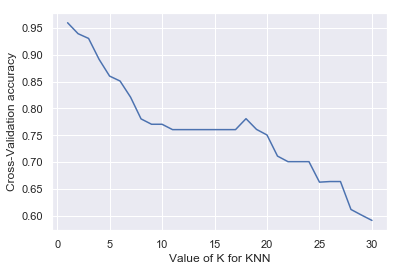

In [59]:
#plot value of k for KNN vs cross-validation accuracy in order to pick optimum k
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(k_range,k_scores)
plt.xlabel("Value of K for KNN")
plt.ylabel("Cross-Validation accuracy")

In [60]:
#utilize optimum k and compare KNN model with decision tree classifier accuracy;also compare against cross-validation
knn = KNeighborsClassifier(n_neighbors=1)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3,random_state=42)
knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)
print("knn test accuracy with optimum k value:",metrics.accuracy_score(y_test, y_pred))
knn = KNeighborsClassifier(n_neighbors=1)
print("knn cross_val_score with optimum k value:",cross_val_score(knn,X,y,cv=4,scoring='accuracy').mean())    

knn test accuracy with optimum k value: 0.966666666667
knn cross_val_score with optimum k value: 0.959907407407


### Choosing the best n_neighbor value improves the model from 0.80 to 0.97 and 0.86 to 0.96 on the test set accuracy and cross-validation accuracy respectively.  Chi-squared feature selection method will be implemented to see if choosing the best features improves the KNN model even further.

In [61]:
#utilize subset selection
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
# extract the best features
test = SelectKBest(score_func=chi2, k=4)
fit = test.fit(X_cols, y)
# summarize scores
print(fit.scores_)

[ 48.71428571  80.          36.46610169  60.          48.5         29.27777778
   5.51048951  37.04166667  18.          17.32911392  17.33653846
  61.82352941  81.35087719  16.96666667   3.64102564  20.61806798]


### The highest scored features are:hair, feathers, eggs, milk, airborne, aquatic, toothed,fins, legs,  and catsize.  The Chi-squared method  dropped the following features: domestic, predator, tail, breathes, venomous, and backbone). 

In [62]:
#compare how the model scores with previous sklearn feaures selected
knn = KNeighborsClassifier(n_neighbors=1)
X2_train, X2_test, y2_train, y2_test = train_test_split(X2,y,test_size = 0.3,random_state=42)
knn.fit(X2_train,y2_train)
y2_pred = knn.predict(X2_test)
print("knn test accuracy on the 9 best sci-kit learn selected features:",metrics.accuracy_score(y2_test,y2_pred))
scores = cross_val_score(knn, X2, y, cv=4)
print("Average knn cross-validation score on sci-kit learn 9 best selected features: {:.5f}".format(scores.mean()))
#compare test and cross validation accuracy with chi square features selected
x1_cols = ['hair', 'feathers', 'eggs', 'milk','toothed','fins', 'legs','airborne','aquatic','catsize']
X1 = df[x1_cols].as_matrix()
knn = KNeighborsClassifier(n_neighbors=1)
X1_train, X1_test, y1_train, y1_test = train_test_split(X1,y,test_size = 0.3,random_state=42)
knn.fit(X1_train,y1_train)
y1_pred = knn.predict(X1_test)
print("knn test accuracy with chi2 features selected:",metrics.accuracy_score(y1_test, y1_pred))
knn = KNeighborsClassifier(n_neighbors=1)
print("knn cross_val_score with chi2 features selected:",cross_val_score(knn,X1,y,cv=4,scoring='accuracy').mean()) 

knn test accuracy on the 9 best sci-kit learn selected features: 0.933333333333
Average knn cross-validation score on sci-kit learn 9 best selected features: 0.96991
knn test accuracy with chi2 features selected: 0.966666666667
knn cross_val_score with chi2 features selected: 0.970324074074


### This shows that the Chi-squared feature selection method scored higher than the Scikit-learn feature selection method. Utilizing the optimum k value as well as the optimum features improved the KNN model from a 0.81 test accuracy to a 0.97 test accuracy. It also improved the cross-val score from 0.86 to 0.97.  So far, the test accuracy is the same, 0.97, on all the models and thus confusion matrix will be utilized to see which model performs the best.  

In [63]:
#perform confusion matrix to analyze FP/FN and how well algorithm classifies
#first is all features, second is chi squared 10 selected features
knn.fit(X1_train, y1_train)
knn_pred = knn.predict(X1_test)
conf_matrix_knn = confusion_matrix(y1_test, knn_pred)
print(conf_matrix_knn)

[[13  0  0  0  0  0]
 [ 0  5  0  0  0  0]
 [ 0  0  0  1  0  0]
 [ 0  0  0  4  0  0]
 [ 0  0  0  0  3  0]
 [ 0  0  0  0  0  4]]


In [64]:
#need to include confusion matrix for each model;show how precision reduced class 4 so model is not always predicting class 4 correctly.  Also compare not just test accuracy but also precision and recall for all 6 classifiers, also compare f1 which is harmonic mean between precision and recall
print(classification_report(y1_test,knn_pred))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00         5
           3       0.00      0.00      0.00         1
           4       0.80      1.00      0.89         4
           6       1.00      1.00      1.00         3
           7       1.00      1.00      1.00         4

    accuracy                           0.97        30
   macro avg       0.80      0.83      0.81        30
weighted avg       0.94      0.97      0.95        30



### The confusion matrices and classification reports show that the decision tree model is performing the best as it has the highest precision, recall and F1 score. 

In [65]:
#import keras sequential model in order to see how deep learning model compares
from keras.models import Sequential
from keras.layers import Dense
from keras.regularizers import l2
import numpy
from keras.optimizers import SGD
numpy.random.seed(7)
model = Sequential()
model.add(Dense(1,input_dim=16, init='zero', activation='linear'))
model.compile(loss='mse', optimizer=SGD(lr=0.01), metrics=['accuracy'])
model.fit(X, y, epochs=50, batch_size=1,shuffle=False)
scores = model.evaluate(X, y)
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

Using TensorFlow backend.


Epoch 1/50
100/100 [==============================] - 0s 3ms/step - loss: 2.0874 - acc: 0.6600
Epoch 2/50
100/100 [==============================] - 0s 1ms/step - loss: 1.4904 - acc: 0.6300
Epoch 3/50
100/100 [==============================] - 0s 1ms/step - loss: 1.1960 - acc: 0.6500
Epoch 4/50
100/100 [==============================] - 0s 1ms/step - loss: 1.0018 - acc: 0.6700
Epoch 5/50
100/100 [==============================] - 0s 1ms/step - loss: 0.8698 - acc: 0.7000
Epoch 6/50
100/100 [==============================] - 0s 1ms/step - loss: 0.7725 - acc: 0.7200
Epoch 7/50
100/100 [==============================] - 0s 1ms/step - loss: 0.6965 - acc: 0.7500
Epoch 8/50
100/100 [==============================] - 0s 1ms/step - loss: 0.6350 - acc: 0.7600
Epoch 9/50
100/100 [==============================] - 0s 1ms/step - loss: 0.5843 - acc: 0.7800
Epoch 10/50
100/100 [==============================] - 0s 1ms/step - loss: 0.5421 - acc: 0.7900
Epoch 11/50
100/100 [============================

### The keras sequential model did well at almost 90% but next we will utilize a single layer perceptron tensorflow ANN model to see if test accuracy improves further. One hot encoding will be implemented since the dataset values are categorical and this way there can be a binarization of all of the features.  

In [66]:
#import packages
import tensorflow as tf

In [67]:
#utilize df1 dataframe, create new df12 in which feature 'venomous' is dropped 
#venomous dropped based on previous data exploration and visualizations
df1 = df1[df1.animal_name != 'girl']
df12 = df1.drop(['venomous'],axis=1)
df12.shape
print(df12.shape)

(100, 17)


In [68]:
#create variable for features and target
X5 = df12.iloc[:, 0:16]
print(X5.head())
y5 = df12.iloc[0:, -1:]
print(y5.head())

  animal_name  hair  feathers  eggs  milk  airborne  aquatic  predator  \
0    aardvark     1         0     0     1         0        0         1   
1    antelope     1         0     0     1         0        0         0   
2        bass     0         0     1     0         0        1         1   
3        bear     1         0     0     1         0        0         1   
4        boar     1         0     0     1         0        0         1   

   toothed  backbone  breathes  fins  legs  tails  domestic  catsize  
0        1         1         1     0     4      0         0        1  
1        1         1         1     0     4      1         0        1  
2        1         1         0     1     0      1         0        0  
3        1         1         1     0     4      0         0        1  
4        1         1         1     0     4      1         0        1  
   Class_Number
0             1
1             1
2             4
3             1
4             1


In [69]:
#set aside 20% for test data, 80% for train
train_x5,test_x5,train_y5,test_y5 = train_test_split(X5,y5,test_size=0.2,random_state=42,stratify=y5)
print(train_x5.shape)
print(test_x5.shape)

(80, 16)
(20, 16)


In [70]:
#create variable for train and test;check that shapes match
train_name5 = train_x5['animal_name']
test_name5 = test_x5['animal_name']
train_x5 = train_x5.iloc[:,1:16]
test_x5 = test_x5.iloc[:,1:16]
print(train_x5.shape)
print(test_x5.shape)
print(test_name5.shape)

(80, 15)
(20, 15)
(20,)


In [72]:
#create placeholders based on shape of columns
X6 = tf.placeholder(tf.float32, [None,15]) #shape is 15 columns 
y6 = tf.placeholder(tf.int32, [None, 1]) #shape is 1 column
y6_one_hot = tf.one_hot(y6, 7)  
y6_one_hot = tf.reshape(y6_one_hot, [-1, 7])
#set model weights
Weight6 = tf.Variable(tf.random_normal([15, 7],seed=0), name='weight')
Bias6 = tf.Variable(tf.random_normal([7],seed=0), name='bias')
#construct model
model6 = tf.matmul(X6, Weight6) + Bias6
hypothesis6 = tf.nn.softmax(model6)
cost6 = tf.nn.softmax_cross_entropy_with_logits_v2(logits=model6, labels=y6_one_hot)
cost16 = tf.reduce_mean(cost6)
train6 = tf.train.GradientDescentOptimizer(learning_rate=0.04).minimize(cost16)
prediction6 = tf.argmax(hypothesis6, 1)
true6 = tf.equal(prediction6, tf.argmax(y6_one_hot, 1))
accuracy6 = tf.reduce_mean(tf.cast(true6, tf.float32))

In [73]:
#utilize ANN model,take a look at loss
with tf.Session() as session:
    session.run(tf.global_variables_initializer())
    for step6 in range(10001):
        session.run(train6, feed_dict={X6: train_x5, y6: train_y5})
        if step6 % 1000 == 0:
            loss6, acc6 = session.run([cost16, accuracy6], feed_dict={X6: train_x5, y6: train_y5})
            print("Step: {:5}\tLoss: {:.3f}\tAccuracy: {:.2%}".format(step6, loss6, acc6))
            
    train_acc6 = session.run(accuracy6, feed_dict={X6: train_x5, y6: train_y5})
    test_acc6,test_predict6,test_correct6 = session.run([accuracy6,prediction6,true6], feed_dict={X6: test_x5, y6: test_y5})
    print("Model Prediction =", train_acc6)
    print("Test Prediction =", test_acc6)

Step:     0	Loss: 4.101	Accuracy: 23.75%
Step:  1000	Loss: 0.210	Accuracy: 86.25%
Step:  2000	Loss: 0.122	Accuracy: 87.50%
Step:  3000	Loss: 0.086	Accuracy: 87.50%
Step:  4000	Loss: 0.067	Accuracy: 90.00%
Step:  5000	Loss: 0.056	Accuracy: 90.00%
Step:  6000	Loss: 0.049	Accuracy: 90.00%
Step:  7000	Loss: 0.043	Accuracy: 90.00%
Step:  8000	Loss: 0.039	Accuracy: 90.00%
Step:  9000	Loss: 0.036	Accuracy: 90.00%
Step: 10000	Loss: 0.033	Accuracy: 90.00%
Model Prediction = 0.9
Test Prediction = 0.9


In [74]:
result6 = pd.DataFrame()
result6['Animal'] = test_name5
result6['Predicted_Class_Type'] = test_predict6
result6['Actual_Class_Type'] = test_y5
result6['Accuracy'] = test_correct6
result6

,Animal,Predicted_Class_Type,Actual_Class_Type,Accuracy
43,lark,2,2,True
22,elephant,1,1,True
60,pike,4,4,True
66,porpoise,1,1,True
48,mink,1,1,True
89,toad,5,5,True
87,swan,2,2,True
10,cheetah,1,1,True
14,crab,5,7,False
50,mongoose,1,1,True


### Even though the tensorflow ANN test model scored well at 90%, removing the attribute venomous made it difficult for the deep learning model to classify class 7(invertebrates). Therefore, venomous will not be removed from the ANN model and the model will be re-tested.  

In [75]:
#utilize df1 dataframe, create new df11 in which feature 'domestic' is dropped
#domestic is dropped based on previous data exploration and visualizations
df1 = df1[df1.animal_name != 'girl']
df11 = df1.drop(['domestic'],axis=1)
df11.shape

(100, 17)

In [76]:
#create variables for features and target
X3 = df11.iloc[:, 0:16]
print(X3.head())
y3 = df11.iloc[0:, -1:]
print(y3.head())
print(type(X3))
print(type(y3))

  animal_name  hair  feathers  eggs  milk  airborne  aquatic  predator  \
0    aardvark     1         0     0     1         0        0         1   
1    antelope     1         0     0     1         0        0         0   
2        bass     0         0     1     0         0        1         1   
3        bear     1         0     0     1         0        0         1   
4        boar     1         0     0     1         0        0         1   

   toothed  backbone  breathes  venomous  fins  legs  tails  catsize  
0        1         1         1         0     0     4      0        1  
1        1         1         1         0     0     4      1        1  
2        1         1         0         0     1     0      1        0  
3        1         1         1         0     0     4      0        1  
4        1         1         1         0     0     4      1        1  
   Class_Number
0             1
1             1
2             4
3             1
4             1
<class 'pandas.core.frame.DataFra

In [77]:
#create train test split with 20 percent test size
train_x,test_x,train_y,test_y = train_test_split(X3,y3,test_size=0.2,random_state=42,stratify=y3)
print(train_x.shape)
print(test_x.shape)

(80, 16)
(20, 16)


In [78]:
#check that shapes match
train_name = train_x['animal_name']
test_name = test_x['animal_name']
train_x = train_x.iloc[:,1:16]
test_x = test_x.iloc[:,1:16]
print(train_x.shape)
print(test_x.shape)
print(test_name.shape)

(80, 15)
(20, 15)
(20,)


In [79]:
#create placeholders based on column size
X4 = tf.placeholder(tf.float32, [None,15]) #shape is 15 columns 
y4 = tf.placeholder(tf.int32, [None, 1]) #shape is 1 column
y4_one_hot = tf.one_hot(y4, 7)  
y4_one_hot = tf.reshape(y4_one_hot, [-1, 7])

In [80]:
#set model weights; create model eqn similar to slope of line 
Weight = tf.Variable(tf.random_normal([15, 7],seed=0), name='weight')
Bias = tf.Variable(tf.random_normal([7],seed=0), name='bias')
#construct model
model = tf.matmul(X4, Weight) + Bias

In [81]:
'''Since this is a multiclassification problem, softmax function instead of 
sigmoid function will be used to calculate the probabilities of each target
class over all the possible target classes'''
hypothesis = tf.nn.softmax(model)
cost = tf.nn.softmax_cross_entropy_with_logits_v2(logits=model, labels=y4_one_hot)
cost1 = tf.reduce_mean(cost)

In [82]:
'''Use the gradient descent optimizer to get the steepest decline in the value
of the loss function where the learning rate is the size of the step heading 
towards the minima'''
train = tf.train.GradientDescentOptimizer(learning_rate=0.04).minimize(cost1)

In [83]:
'''Use argmax function to find the argument at which the function is at
its maximum'''
prediction = tf.argmax(hypothesis, 1)
true = tf.equal(prediction, tf.argmax(y4_one_hot, 1))
accuracy = tf.reduce_mean(tf.cast(true, tf.float32))

In [84]:
#take a look at ANN model accuracy and loss metrics
with tf.Session() as session:
    session.run(tf.global_variables_initializer())
    for step in range(10001):
        session.run(train, feed_dict={X4: train_x, y4: train_y})
        if step % 1000 == 0:
            loss, acc = session.run([cost1, accuracy], feed_dict={X4: train_x, y4: train_y})
            print("Step: {:5}\tLoss: {:.3f}\tAccuracy: {:.2%}".format(step, loss, acc))
            
    train_acc = session.run(accuracy, feed_dict={X4: train_x, y4: train_y})
    test_acc,test_predict,test_correct = session.run([accuracy,prediction,true], feed_dict={X4: test_x, y4: test_y})
    print("Model Prediction =", train_acc)
    print("Test Prediction =", test_acc)

Step:     0	Loss: 3.287	Accuracy: 30.00%
Step:  1000	Loss: 0.177	Accuracy: 83.75%
Step:  2000	Loss: 0.103	Accuracy: 87.50%
Step:  3000	Loss: 0.073	Accuracy: 88.75%
Step:  4000	Loss: 0.058	Accuracy: 90.00%
Step:  5000	Loss: 0.049	Accuracy: 90.00%
Step:  6000	Loss: 0.043	Accuracy: 90.00%
Step:  7000	Loss: 0.038	Accuracy: 90.00%
Step:  8000	Loss: 0.035	Accuracy: 90.00%
Step:  9000	Loss: 0.032	Accuracy: 90.00%
Step: 10000	Loss: 0.030	Accuracy: 90.00%
Model Prediction = 0.9
Test Prediction = 0.95


In [85]:
#print results to look for any trends
result = pd.DataFrame()
result['Animal'] = test_name
result['Predicted_Class_Type'] = test_predict
result['Actual_Class_Type'] = test_y
result['Accuracy'] = test_correct
result

,Animal,Predicted_Class_Type,Actual_Class_Type,Accuracy
43,lark,2,2,True
22,elephant,1,1,True
60,pike,4,4,True
66,porpoise,1,1,True
48,mink,1,1,True
89,toad,5,5,True
87,swan,2,2,True
10,cheetah,1,1,True
14,crab,5,7,False
50,mongoose,1,1,True


### Even though the tensorflow model did well at 95% test accuracy, the Decision Tree Classifier, at 97%, gave the best overall test accuracy, precision, recall and F1 score for animal classification. The deep learning models gave a lot of valuable info about the loss evaluation metrics. Namely, the loss metrics showed that the ANN model had difficulty classifying class number 7(invertebrates).  This could be due to a combination of there being only 10 animals in class number 7 as well as due to the data exploration and visualization findings showing that backbone was not the strongest predictor of animal class.  The deep learning models' evaluation metrics also showed that individually dropping the features of domestic, aquatic or tail did not change the test accuracy even though dropping any one of the other attributes decreased the model's accuracy.  This was an interesting finding as it matched our earlier data exploration and visualization observations that those three attributes were weak predictors of animal class.  This project was unique in that it had a multi-class classification target and an imbalanced dataset which affected accuracy. However, tuning the hyperparameters in the models and choosing the best algorithm surmounted the hurdles of the dataset successfully. 